In [1]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
import re

In [2]:
# Loading the dataset
colnames=['id','social_media','output','comment_text']

In [3]:
# Here encoding is given for reading the special charecters
df=pd.read_csv("twitter_validation.csv",encoding="ISO-8859-1",names=colnames,header=None)
df

,id,social_media,output,comment_text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [4]:
df.head()

,id,social_media,output,comment_text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [5]:
df.tail()

,id,social_media,output,comment_text
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1000 non-null   int64 
 1   social_media  1000 non-null   object
 2   output        1000 non-null   object
 3   comment_text  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


# **Feature Engineering**

In [7]:
df.isna().sum()

id              0
social_media    0
output          0
comment_text    0
dtype: int64

In [8]:
df['social_media'].unique()

array(['Facebook', 'Amazon', 'Microsoft', 'CS-GO', 'Google', 'FIFA',
       'MaddenNFL', 'TomClancysRainbowSix', 'AssassinsCreed',
       'CallOfDuty', 'Dota2', 'Verizon', 'NBA2K', 'Nvidia',
       'GrandTheftAuto(GTA)', 'RedDeadRedemption(RDR)', 'Hearthstone',
       'ApexLegends', 'Overwatch', 'PlayerUnknownsBattlegrounds(PUBG)',
       'Borderlands', 'PlayStation5(PS5)', 'johnson&johnson', 'Fortnite',
       'Xbox(Xseries)', 'CallOfDutyBlackopsColdWar', 'HomeDepot',
       'Cyberpunk2077', 'TomClancysGhostRecon', 'WorldOfCraft',
       'LeagueOfLegends', 'Battlefield'], dtype=object)

In [9]:
print("the total row of data is ",len(df))

the total row of data is  1000


In [10]:
df['social_media'].value_counts()

RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
TomClancysRainbowSix                 35
Nvidia                               35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
Facebook                             33
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Overwatch                            32
Hearthstone                          32
Verizon                              32
CS-GO                                32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                                27


<AxesSubplot:xlabel='social_media', ylabel='count'>

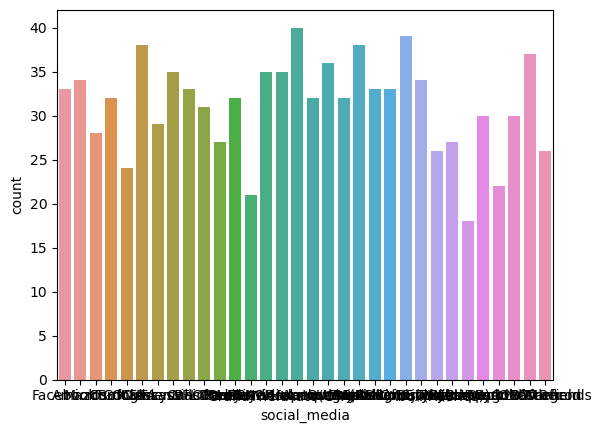

In [11]:
sns.countplot(x='social_media',data=df)

In [12]:
df['output'].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: output, dtype: int64

<AxesSubplot:xlabel='output', ylabel='count'>

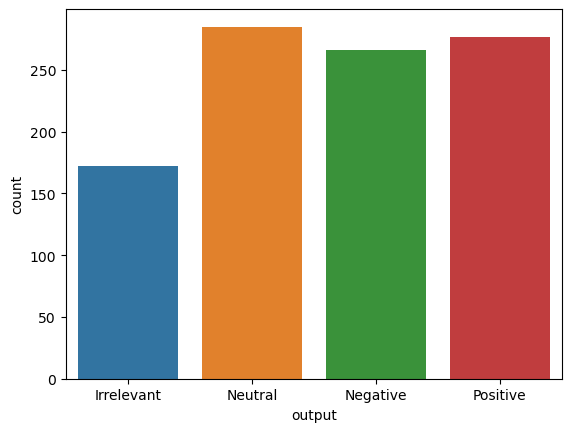

In [13]:
sns.countplot(x='output',data=df)

In [14]:
# Irrelevant
df.drop(df.index[(df['output']=='Irrelevant')],axis=0,inplace=True)
df

,id,social_media,output,comment_text
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [15]:
df.reset_index(drop=True,inplace=True)
df

,id,social_media,output,comment_text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [16]:
df.drop(['id','social_media'],axis=1,inplace=True)
df

,output,comment_text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [17]:
df['output']=df['output'].map({'Negative':-1,'Neutral':0,'Positive':1})
df

,output,comment_text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


# **Preprocessing the data**

In [18]:
tweets=df.comment_text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: comment_text, Length: 828, dtype: object

In [19]:
# Tokenisation
from nltk import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: comment_text, Length: 828, dtype: object

In [20]:
tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')
tweets

C:\Users\ABRA\AppData\Local\Temp\ipykernel_4744\1534739608.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')


0      BBC News Amazon boss Jeff Bezos rejects claims...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp I ve had Madeleine McCann in my cell...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so it s time to drink wine n play...
826     Bought a fraction of Microsoft today Small wins 
827    Johnson Johnson to stop selling talc baby powd...
Name: comment_text, Length: 828, dtype: object

In [21]:
from nltk.tokenize import word_tokenize
tweets=tweets.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
tweets

0      BBC News Amazon boss Jeff Bezos rejects claims...
1      Microsoft Why pay for WORD when functions poor...
2      CSGO matchmaking full closet hacking truly awf...
3      Now the President slapping Americans the face ...
4      EAHelp had Madeleine McCann cellar for the pas...
                             ...                        
823    Please explain how this possible How can they ...
824    Good Sony much want see the new PS5 what going...
825    Today sucked time drink wine play borderlands ...
826           Bought fraction Microsoft today Small wins
827    Johnson Johnson stop selling talc baby powder ...
Name: comment_text, Length: 828, dtype: object

In [22]:
# Stemming
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
ss=SnowballStemmer('english')
#for i in tweets:
# print(ss.stem(i.lower()))
tweets=tweets.apply(lambda x:[ss.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:" ".join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay for word when function poor ...
2           csgo matchmak full closet hack truli aw game
3      now the presid slap american the face that rea...
4      eahelp had madelein mccann cellar for the past...
                             ...                        
823    pleas explain how this possibl how can they le...
824    good soni much want see the new ps5 what go ri...
825    today suck time drink wine play borderland unt...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder and...
Name: comment_text, Length: 828, dtype: object

In [23]:
# Removing Stopwords
from nltk.corpus import stopwords
data_stopwords=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in tk.tokenize(x) if not i in data_stopwords]).apply(lambda x:" ".join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      eahelp madelein mccann cellar past year littl ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine play borderland sun...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder can...
Name: comment_text, Length: 828, dtype: object

In [24]:
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train=vec.fit_transform(tweets)
print(train)

  (0, 691)	0.2608257828483461
  (0, 1004)	0.2608257828483461
  (0, 1130)	0.23509805002803952
  (0, 1996)	0.13277165480466424
  (0, 309)	0.22681557001542715
  (0, 860)	0.17354914655342313
  (0, 807)	0.21432663830218204
  (0, 2761)	0.2608257828483461
  (0, 568)	0.2608257828483461
  (0, 1833)	0.24577602391989378
  (0, 633)	0.22681557001542715
  (0, 376)	0.1515362387424402
  (0, 2287)	0.38864111655856126
  (0, 538)	0.49155204783978756
  (1, 797)	0.4055823664694651
  (1, 2891)	0.4055823664694651
  (1, 2558)	0.3821800909185634
  (1, 1405)	0.4055823664694651
  (1, 3679)	0.36557591217188057
  (1, 2462)	0.3126902562590763
  (1, 3639)	0.26216072802580975
  (1, 2155)	0.24555654927912696
  (2, 1427)	0.1689251539717079
  (2, 486)	0.36574263611909275
  (2, 3432)	0.36574263611909275
  :	:
  (825, 3393)	0.3395996844494919
  (825, 3383)	0.2560582225152134
  (825, 631)	0.22981061112100945
  (825, 997)	0.2315686698425631
  (825, 3373)	0.21750175079084832
  (825, 3226)	0.2904718522758868
  (825, 2527)	0.1

In [25]:
y=df['output'].values
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

# **Model Creation**

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(train,y,test_size=0.3,random_state=42)
xtrain

<579x3783 sparse matrix of type '<class 'numpy.float64'>'
	with 7250 stored elements in Compressed Sparse Row format>

In [27]:
xtest

<249x3783 sparse matrix of type '<class 'numpy.float64'>'
	with 3255 stored elements in Compressed Sparse Row format>

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
models=[SVC(),KNeighborsClassifier(n_neighbors=5),MultinomialNB(),RandomForestClassifier(),DecisionTreeClassifier()]
for model in models:
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    score=accuracy_score(ytest,ypred)*100
    print("{}: {}".format(model,score),end="\n\n")

SVC(): 58.23293172690763

KNeighborsClassifier(): 44.97991967871486

MultinomialNB(): 56.22489959839358

RandomForestClassifier(): 53.81526104417671

DecisionTreeClassifier(): 48.59437751004016



Observation:
Support Vector Classifier have high efficiency when compared to other algorithms

In [29]:
model=SVC()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

          -1       0.67      0.52      0.59        79
           0       0.46      0.76      0.57        79
           1       0.76      0.48      0.59        91

    accuracy                           0.58       249
   macro avg       0.63      0.59      0.58       249
weighted avg       0.64      0.58      0.58       249



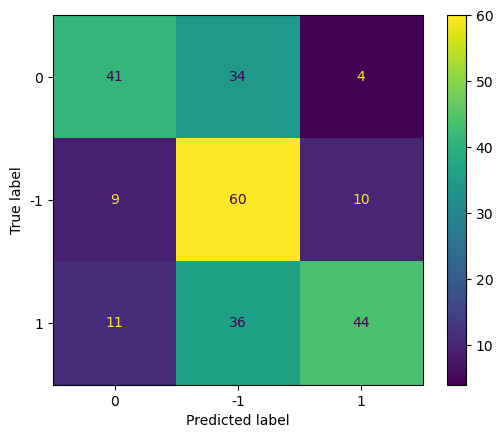

In [30]:
label=['0','-1','1']
result=confusion_matrix(ytest,ypred)
cmd=ConfusionMatrixDisplay(result,display_labels=label)
cmd.plot()